# Sheet 5: Solution

In [1]:
options(jupyter.plot_mimetypes = 'image/png',repr.plot.width=4,repr.plot.height=4) # this is just to render graphics as png and not as svg, and to adjust the default size

## Exercise 1: Variance of beta

1. The criterion to minimize in ridge regression is given by
$$RSS(\beta, \lambda) := (\mathbf y - \mathbf X \beta)^T(\mathbf y - \mathbf X \beta) + \lambda \beta^T \mathbf I \beta.$$

Thus, we obtain the ridge expression as a special case of the generalized Tikhonov, by setting $\mathbf Q : = \mathbf I.$

2. Taking the derivative and setting it to zero, we have
$$ \frac{\partial}{\partial \beta} ((\mathbf y - \mathbf X \beta)^T(\mathbf y - \mathbf X \beta) + \lambda \beta^T \mathbf Q \beta) = 0,$$
which simplifies to 
$$ -2 \mathbf X^T \mathbf y + 2 \mathbf X^T \mathbf X \beta + 2 \lambda \mathbf Q \beta = 0.$$

Factoring $\beta$, we then obtain,

$$(\mathbf X^T \mathbf X + \lambda \mathbf Q) \beta = \mathbf X^T \mathbf y.$$

By assumption, we know that $(\mathbf X^T \mathbf X + \lambda \mathbf Q)$ is invertible, and thus,
$$ \hat \beta := (\mathbf X^T \mathbf X + \lambda \mathbf Q)^{-1} \mathbf X^T \mathbf y.$$

3. We have $$\hat {\mathbf y} = \mathbf X \hat \beta = \mathbf X (\mathbf X^T \mathbf X + \lambda \mathbf Q)^{-1} \mathbf X^T \mathbf y$$ and thus
$$ \mathbf H_\lambda = \mathbf X (\mathbf X^T \mathbf X + \lambda \mathbf Q)^{-1} \mathbf X^T.$$

4. Here, we need to use the SVD of $\mathbf X$ given by $\mathbf U \mathbf D \mathbf V^T$ and the eigendecomposition of $\mathbf X^T \mathbf X$ given by $\mathbf V \mathbf D^2 \mathbf V^T.$ Not ethat
$$ \mathbf X^T \mathbf X = \mathbf V \mathbf D \mathbf U^T \mathbf U \mathbf D \mathbf V^T = \mathbf V \mathbf D^2 \mathbf V^T,$$
and
$$ (\mathbf X^T \mathbf X)^{-1} = \mathbf V \mathbf D^{-2} \mathbf V^T.$$

Then the hat matrix can be expressed as follows,

$$\mathbf H_\lambda = \mathbf U \mathbf D \mathbf V^T (\mathbf V \mathbf D^2 \mathbf V^T + \lambda \mathbf I)^{-1} \mathbf V \mathbf D \mathbf U^T = \mathbf U \mathbf D \mathbf V^T \mathbf V (\mathbf D^2 + \lambda \mathbf I)^{-1} \mathbf V^T \mathbf V \mathbf D \mathbf U^T = \mathbf U \mathbf D (\mathbf D^2 + \lambda \mathbf I)^{-1} \mathbf D \mathbf U^T,$$

since $\mathbf V \mathbf D^2 \mathbf V^T$ and $\lambda \mathbf I$ commute and are therefore simultaneously diagonalizable. Finally, since the trace of a matrix is equal to the sum of its eigenvalues, it readily follows that 

$$trace(\mathbf H_\lambda) = \sum_{j=1}^p \frac{d_j^2}{d_j^2 +\lambda},$$

where $d_j$ is the $j$th diagonal entry of $\mathbf D.$

## Exercise 2: Elastic-Net with Lasso

Augment $\mathbf X$ with a multiple of the $p \times p$ identity to get

$$\hat {\mathbf X} = \begin{bmatrix} \mathbf X  \\ \gamma \mathbf I  \end{bmatrix}.$$

Then $\hat {\mathbf X} \beta = \begin{bmatrix} \mathbf X \beta \\ \gamma \mathbf \beta  \end{bmatrix}.$ We also modify $\mathbf y$ with $p$ zeros values as

$$ \hat{\mathbf y} = \begin{bmatrix} \mathbf y  \\ 0 \end{bmatrix}.$$

Then we get

$$
\| \hat{\mathbf y}  - \hat {\mathbf X} \beta  \|^2_2 = \left\|  \begin{bmatrix} \mathbf y - \mathbf X \beta \\ \gamma \beta \end{bmatrix}   \right\|^2_2. = \| \mathbf y - \mathbf X \beta \|^2_2 + \gamma^2 \|\beta\|^2_2.
$$

Now in the this augmented space a lasso problem for $\beta$ is

$$\hat \beta = \arg \min_\beta (\| \mathbf y - \mathbf X \beta \|^2_2 + \gamma^2 \|\beta\|^2_2 + \hat \lambda \|\beta\|_1).$$

Rewriting this using the above equation we get in the original variables the following
$$ \hat \beta = \arg \min_\beta (\| \mathbf y - \mathbf X \beta \|^2_2 + \gamma^2 \|\beta\|^2_2 + \hat \lambda \|\beta\|_1).
$$

By setting $\gamma^2 = \lambda \alpha$ or $\gamma = \sqrt{\lambda \alpha}$ and $\hat \lambda = \lambda (1-\alpha),$ we get the elastic-net regression.

Thus to solve the requested minimization problem given $\mathbf y, \mathbf X, \lambda$ and $\alpha$ perform the following steps

1. Augment $\mathbf y$ with $p$ additional zeros to get $\hat{\mathbf y} = \begin{bmatrix} \mathbf y  \\ 0 \end{bmatrix}.$
2. Augment $\mathbf X$ with the  multiple of the $p \times p$ identity matrix $\sqrt{\lambda \alpha} \mathbf I$ to get $\hat {\mathbf X} = \begin{bmatrix} \mathbf X  \\ \sqrt{\lambda \alpha} \mathbf I  \end{bmatrix}.$
3. Set $\hat \lambda = \lambda (1-\alpha).$
4. Solve the lasse minimization problem with input $\hat{\mathbf y}, \hat{\mathbf X}, \hat \lambda.$

The solution $\hat \beta$ is the desired solution to the entire problem.

## Exercise 3: Ridge regression

In [2]:
prostate <- read.table("prostate.data", header=TRUE)

In [3]:
set.seed(1)
trainIndex <- sample(prostate$train) 
prostateTest <- prostate[!trainIndex, 1:9]  
prostate <- prostate[trainIndex, 1:9]
### Centering and scaling
xbar <- colMeans(prostate)
vbar <- colSums(scale(prostate, center = xbar, scale = FALSE)^2)/(dim(prostate)[1]-1)
prostateScaled <- scale(prostate, 
                        center = xbar, 
                        scale = c(sqrt(vbar)[-9], 1))
prostateTestScaled <- scale(prostateTest,
                            center = xbar,
                            scale = c(sqrt(vbar)[-9], 1))
Ntrain <- dim(prostate)[1]
Ntest <- dim(prostateTest)[1]

## Ridge Regression Fitting

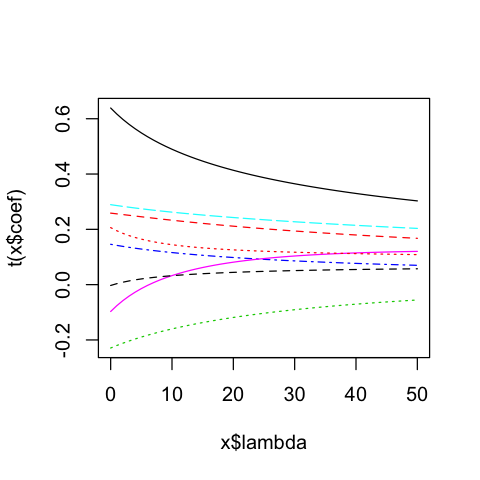

In [4]:
library(MASS)
lambda <- seq(0, 50, 1)
prostateRidge <- lm.ridge(lpsa ~ . - 1, 
                          data = as.data.frame(prostateScaled),
                          lambda = lambda)
plot(prostateRidge)

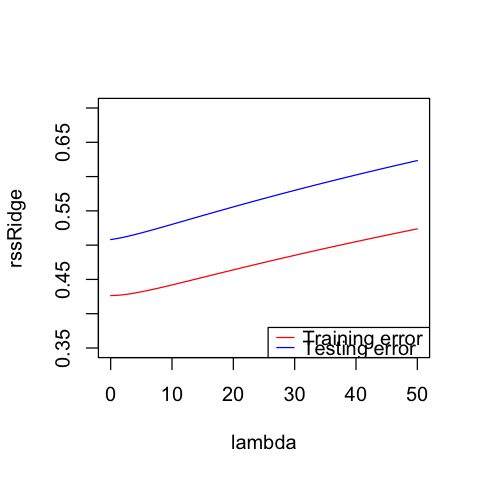

In [10]:
rssRidge <-  colMeans((prostateScaled[, 9] -
                       prostateScaled[, -9] %*% 
                       t(coefficients(prostateRidge)))^2
                      )
rssRidgePredict <- colMeans((prostateTestScaled[, 9] - 
                             prostateTestScaled[, -9] %*% 
                             t(coefficients(prostateRidge)))^2
                            )
plot(lambda, rssRidge, type = "l", col = "red", ylim = c(0.35, 0.7))
lines(lambda, rssRidgePredict, col = "blue")
legend("bottomright",lty=1,col=c("red","blue"),legend = c("Training error", "Testing error"),text.width=20)

## Lasso Fitting

For lasso we use $\texttt{glmnet}$, which has an interface more similar
to $\texttt{lm.fit}$ than to $\texttt{lm}$. You have to specify the matrix
of predictors and the vector of response values. You do not need to
specify a $\lambda$ sequence, in fact, you should rely on the sequence
of $\lambda$ values computed automatically unless you know what you
are doing. There is also an $\alpha$ argument to the function, which
by default is 1 giving lasso. Values in $(0,1)$ will produce the
elastic net penalties, where the penalty function is a combination of
the 1-norm as in pure lasso and the 2-norm as in ridge
regression. Note that, though $\alpha = 0$ formally gives ridge
regression, this choice of $\alpha$ is not possible with
$\texttt{glmnet}$.

In [11]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



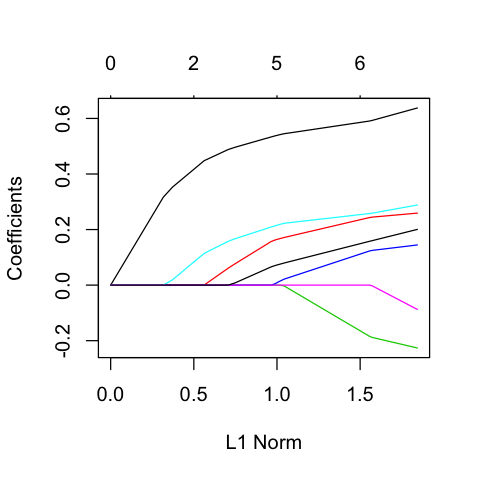

In [12]:
prostateGlmnet <- glmnet(x = prostateScaled[, 1:8],
                         y = prostateScaled[, 9],
                         )
plot(prostateGlmnet)

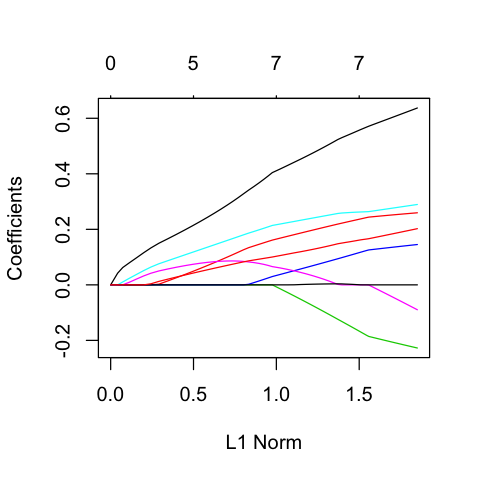

In [13]:
prostateGlmnetEL1 <- glmnet(x = prostateScaled[, 1:8],
                         y = prostateScaled[, 9], alpha = 0.2, 
                         )
plot(prostateGlmnetEL1)

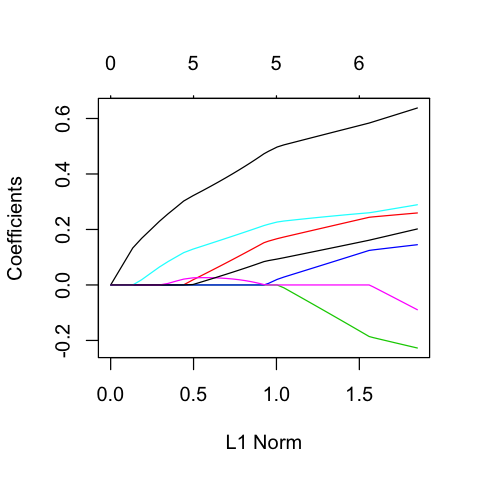

In [14]:
prostateGlmnetEL2 <- glmnet(x = prostateScaled[, 1:8],
                         y = prostateScaled[, 9], alpha = 0.5, 
                         )
plot(prostateGlmnetEL2)

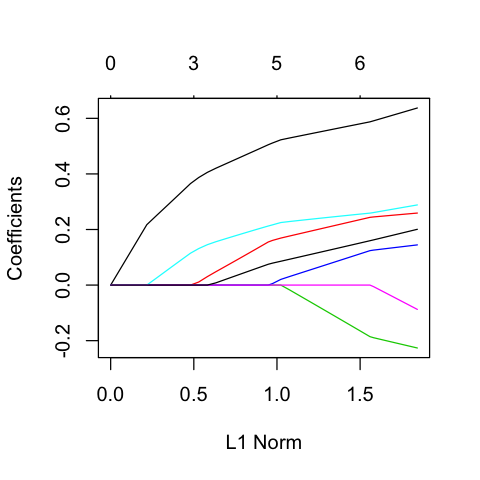

In [15]:
prostateGlmnetEL3 <- glmnet(x = prostateScaled[, 1:8],
                         y = prostateScaled[, 9], alpha = 0.7, 
                         )
plot(prostateGlmnetEL3)

We compute and  plot again the average prediction
error for the test and the training data as a function of $\lambda$.

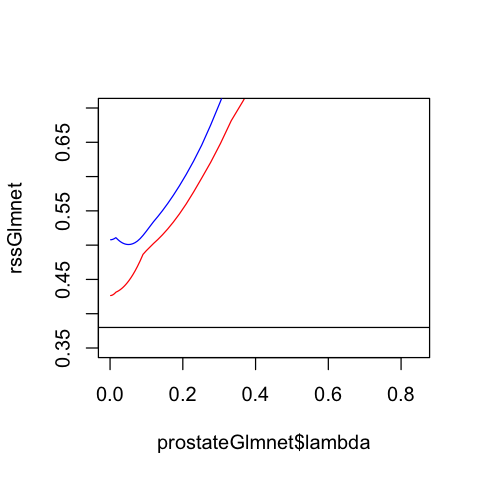

In [19]:
rssGlmnet <- colMeans((prostateScaled[, 9] - 
                       predict(prostateGlmnet, prostateScaled[, -9]))^2
                      )
rssGlmnetPredict <- colMeans((prostateTestScaled[, 9] - 
                              predict(prostateGlmnet, prostateTestScaled[, -9]))^2
                             )
rssGlmnetPredict1 <- colMeans((prostateTestScaled[, 9] - 
                              predict(prostateGlmnetEL1, prostateTestScaled[, -9]))^2
                             )
rssGlmnetPredict2 <- colMeans((prostateTestScaled[, 9] - 
                              predict(prostateGlmnetEL2, prostateTestScaled[, -9]))^2
                             )
rssGlmnetPredict3 <- colMeans((prostateTestScaled[, 9] - 
                              predict(prostateGlmnetEL3, prostateTestScaled[, -9]))^2
                             )
plot(prostateGlmnet$lambda, rssGlmnet, type = "l", col = "red", ylim = c(0.35, 0.7))
lines(prostateGlmnet$lambda, rssGlmnetPredict, col = "blue")
legend("bottomright",lty=1,col=c("red","blue"),legend = c("Training error", "Testing error"),text.width=20)

In [13]:
compMat <- matrix(0, 8, 5)
colnames(compMat) <- c("Ridge", "Lasso", "Elastic Net 1", "Elastic Net 2", "Elastic Net 3")
rownames(compMat) <- names(prostate)[1:8]
compMat[, "Ridge"] <- coefficients(prostateRidge)[which.min(rssRidgePredict), ]
compMat[, "Lasso"] <- coefficients(prostateGlmnet)[-1, which.min(rssGlmnetPredict)]
compMat[, "Elastic Net 1"] <- coefficients(prostateGlmnetEL1)[-1, which.min(rssGlmnetPredict1)]
compMat[, "Elastic Net 2"] <- coefficients(prostateGlmnetEL2)[-1, which.min(rssGlmnetPredict2)]
compMat[, "Elastic Net 3"] <- coefficients(prostateGlmnetEL3)[-1, which.min(rssGlmnetPredict3)]
compMat
c(min(rssRidgePredict), min(rssGlmnetPredict), min(rssGlmnetPredict1), min(rssGlmnetPredict2), min(rssGlmnetPredict3))

,Ridge,Lasso,Elastic Net 1,Elastic Net 2,Elastic Net 3
lcavol,0.643644414,0.56903878,0.63702744,0.55737153,0.56307751
lweight,0.260581059,0.20928299,0.25958779,0.22018902,0.21551501
age,-0.230861289,-0.09862584,-0.22742448,-0.12637130,-0.11450357
lbph,0.147012639,0.07496092,0.14525329,0.09218796,0.08469585
svi,0.291408117,0.24104899,0.28953708,0.25111045,0.24660807
lcp,-0.097911853,0.00000000,-0.08969709,0.00000000,0.00000000
gleason,-0.002976996,0.00000000,0.00000000,0.00000000,0.00000000
pgg45,0.207799316,0.12078733,0.20236595,0.13995264,0.13147522


[1] 0.5080935 0.5009177 0.5081882 0.5067208 0.5037865

In [14]:
compMat <- matrix(0, 8, 5)
colnames(compMat) <- c("Ridge", "Lasso", "Elastic Net 1", "Elastic Net 2", "Elastic Net 3")
rownames(compMat) <- names(prostate)[1:8]
compMat[, "Ridge"] <- coefficients(prostateRidge)[which.min(rssRidgePredict), ]
compMat[, "Lasso"] <- coefficients(prostateGlmnet)[-1, which.min(rssGlmnetPredict)]
compMat[, "Elastic Net 1"] <- coefficients(prostateGlmnetEL1)[-1, which.min(rssGlmnetPredict1)]
compMat[, "Elastic Net 2"] <- coefficients(prostateGlmnetEL2)[-1, which.min(rssGlmnetPredict2)]
compMat[, "Elastic Net 3"] <- coefficients(prostateGlmnetEL3)[-1, which.min(rssGlmnetPredict3)]

In [15]:
compMat

,Ridge,Lasso,Elastic Net 1,Elastic Net 2,Elastic Net 3
lcavol,0.643644414,0.56903878,0.63702744,0.55737153,0.56307751
lweight,0.260581059,0.20928299,0.25958779,0.22018902,0.21551501
age,-0.230861289,-0.09862584,-0.22742448,-0.12637130,-0.11450357
lbph,0.147012639,0.07496092,0.14525329,0.09218796,0.08469585
svi,0.291408117,0.24104899,0.28953708,0.25111045,0.24660807
lcp,-0.097911853,0.00000000,-0.08969709,0.00000000,0.00000000
gleason,-0.002976996,0.00000000,0.00000000,0.00000000,0.00000000
pgg45,0.207799316,0.12078733,0.20236595,0.13995264,0.13147522
